## Exploratory Data Analysis (EDA) for `benin-malanville.csv`

### 1. import required packages  


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### 2. Load the Dataset and display the first few rows


In [3]:
data = pd.read_csv("datasets/benin-malanville.csv")
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


### 3. Shape and statistical description  for numerical columns

In [4]:
data.shape

(525600, 19)

In [5]:
data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


### 3. Shape and statistical description  for numerical columns

In [6]:
data.isnull().sum()
# here only Comments column are all null

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

### 5. Data Cleaning


In [7]:
# drop columns that have null value above threshold ,for now above the half of length
threshold  = len(data)/2
cleaned_data = data.dropna(axis=1, thresh=threshold)
# Convert 'Timestamp' to datetime
cleaned_data.loc[:, 'Timestamp'] = pd.to_datetime(cleaned_data['Timestamp'])
cleaned_data.set_index('Timestamp', inplace=True)



cleaned_data.head()


C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
Timestamp,,,,,,,,,,,,,,,,,
2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


### 6. Visualize the Data


####  Uni-variant

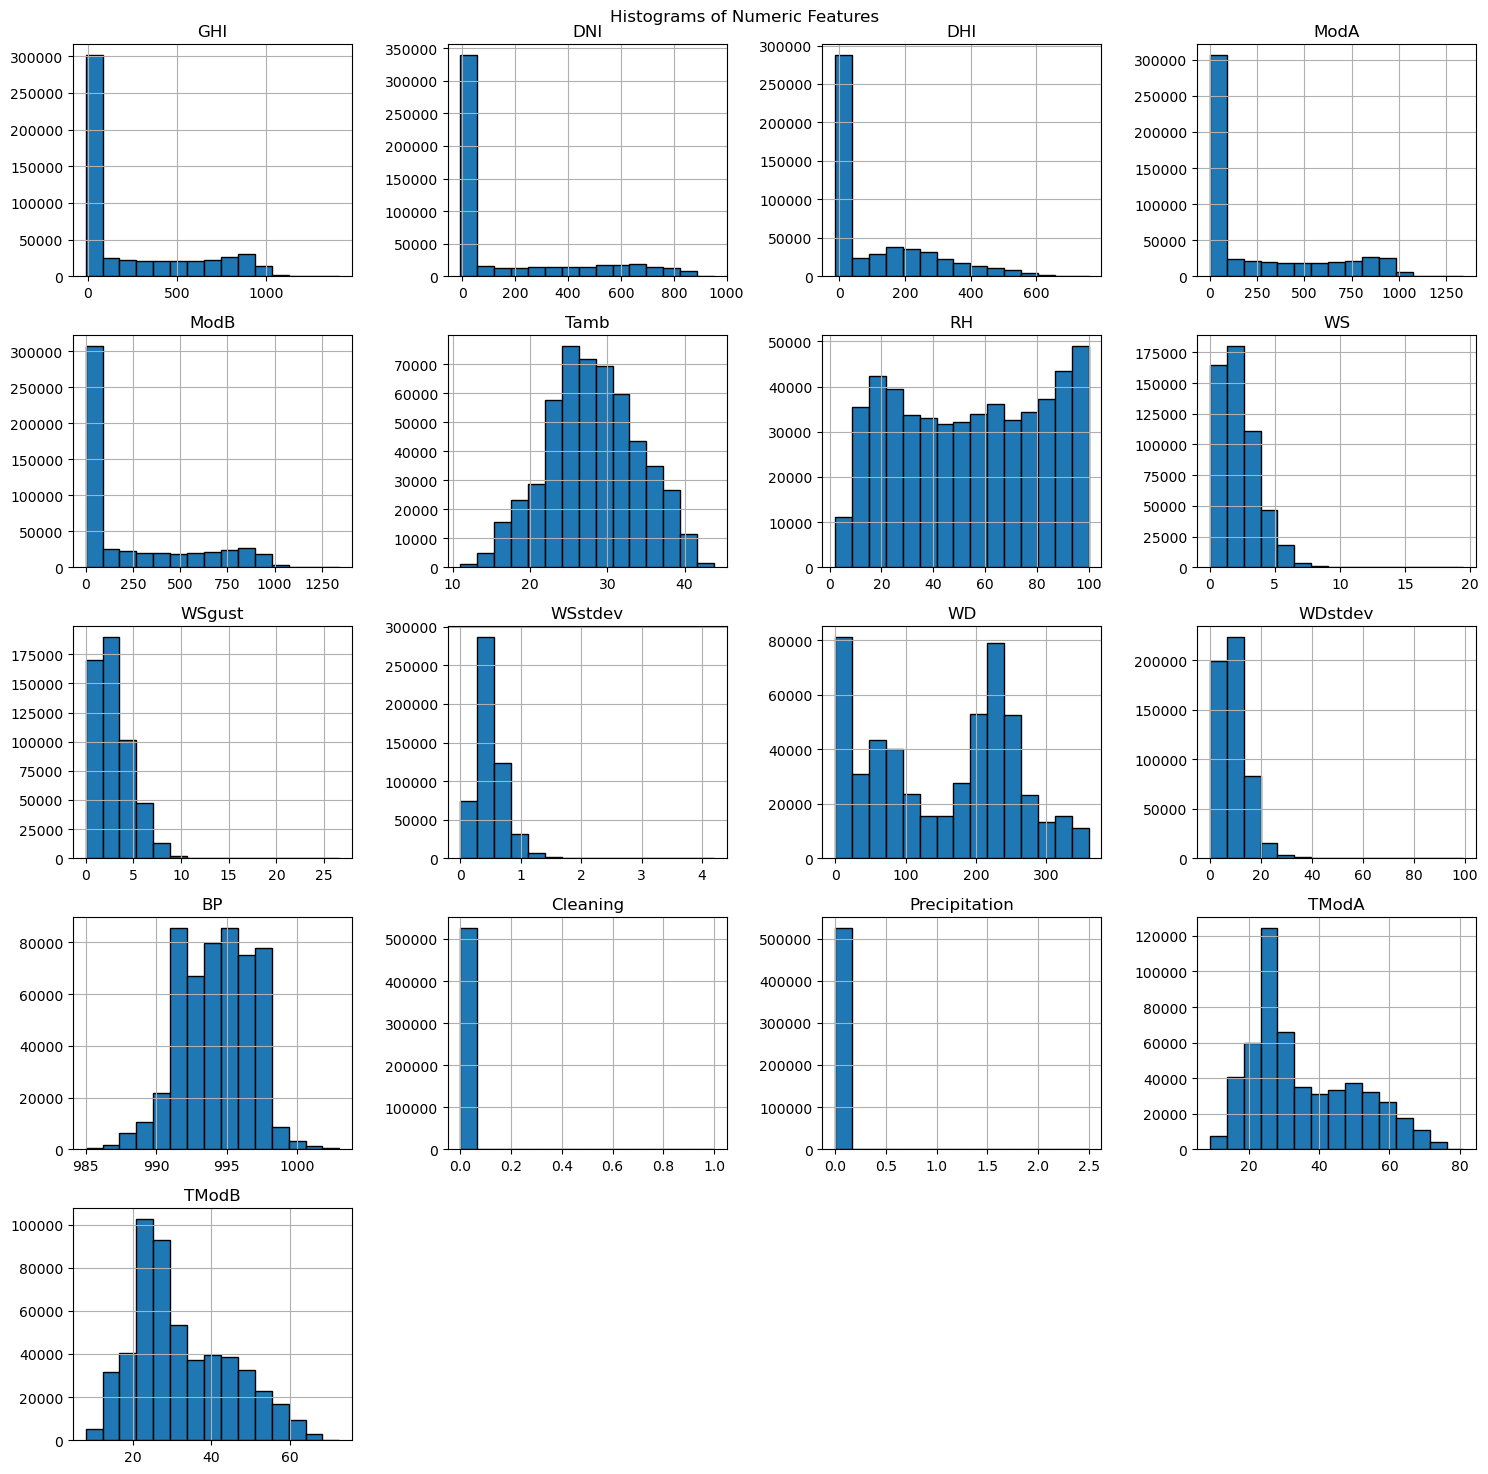

In [8]:
df = pd.DataFrame(cleaned_data)
# Plotting histograms for each column
df.hist(figsize=(15, 15), bins=15, edgecolor='black')
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout() 
plt.show()

###   Multi-variant

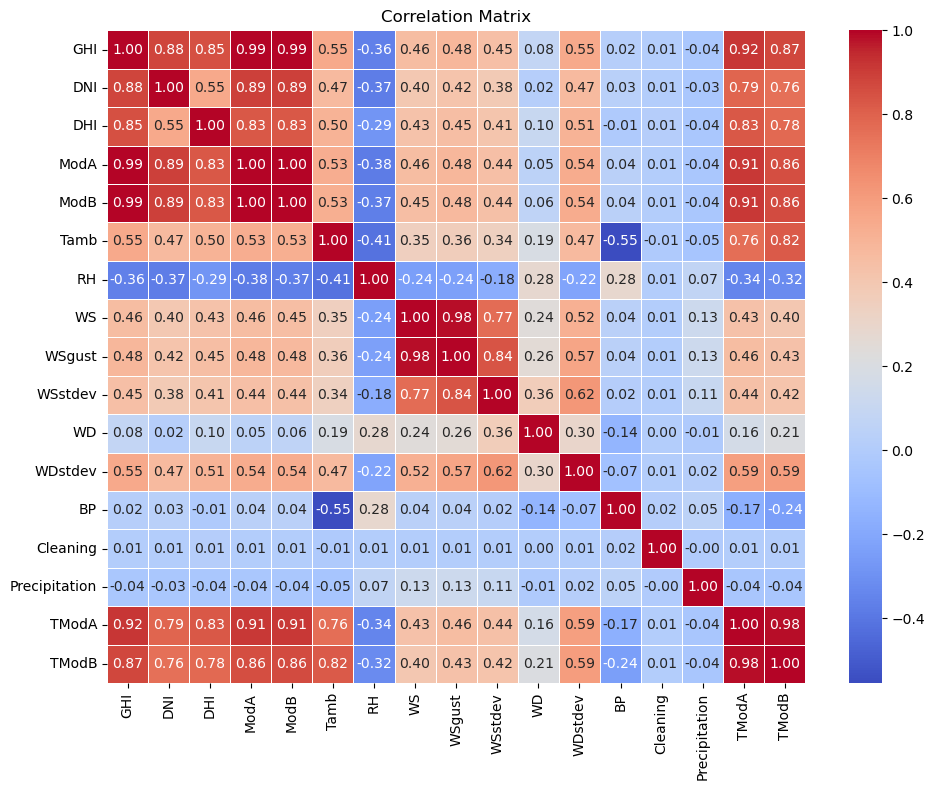

In [15]:
# Select only numeric columns for correlation matrix
numeric_data = cleaned_data.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

#### Area Plot of GHI, DNI, DHI, and Tamb

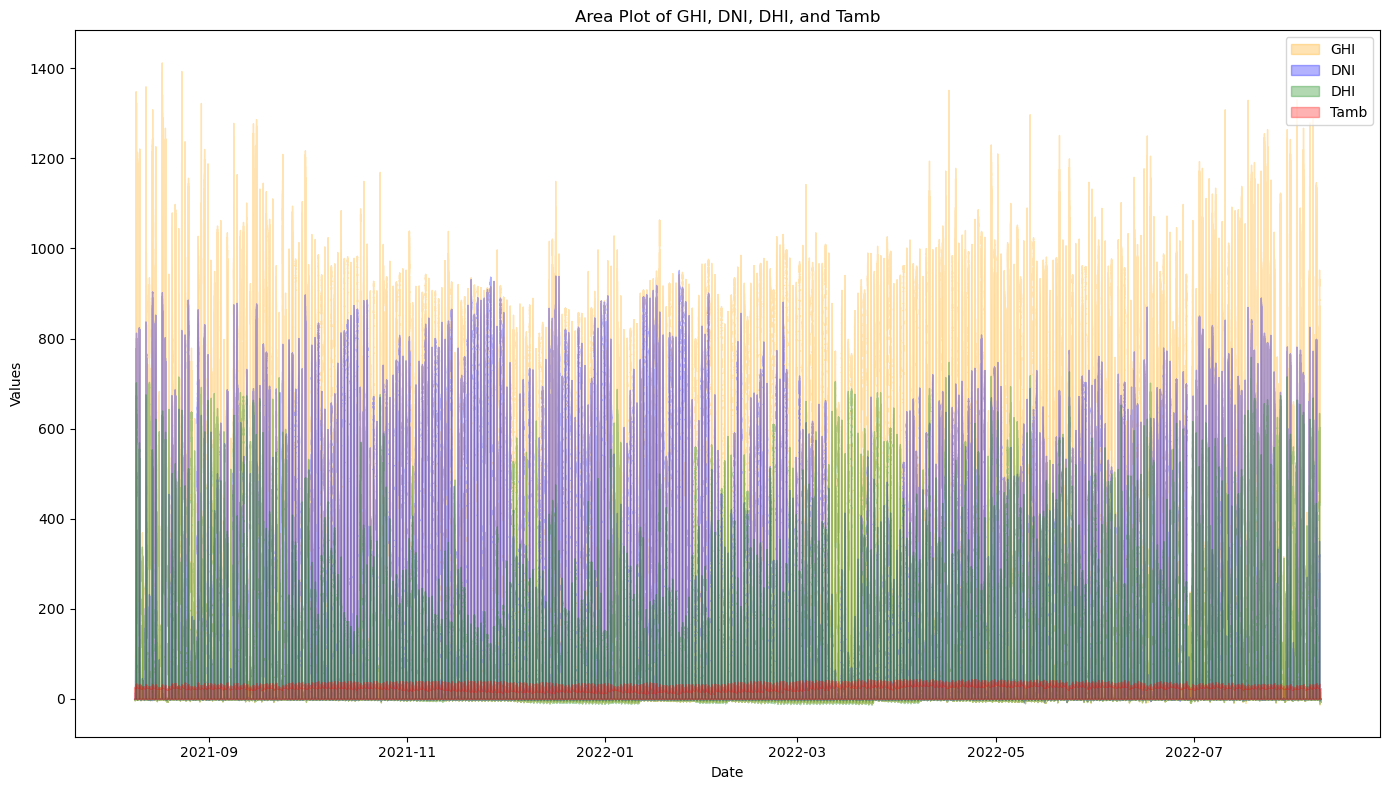

In [17]:
plt.figure(figsize=(14, 8))

plt.fill_between(cleaned_data.index, cleaned_data['GHI'], color='orange', alpha=0.3, label='GHI')
plt.fill_between(cleaned_data.index, cleaned_data['DNI'], color='blue', alpha=0.3, label='DNI')
plt.fill_between(cleaned_data.index, cleaned_data['DHI'], color='green', alpha=0.3, label='DHI')
plt.fill_between(cleaned_data.index, cleaned_data['Tamb'], color='red', alpha=0.3, label='Tamb')

plt.title('Area Plot of GHI, DNI, DHI, and Tamb')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.tight_layout()
plt.show()


#### Impact of Cleaning on Sensor Readings (ModA, ModB)

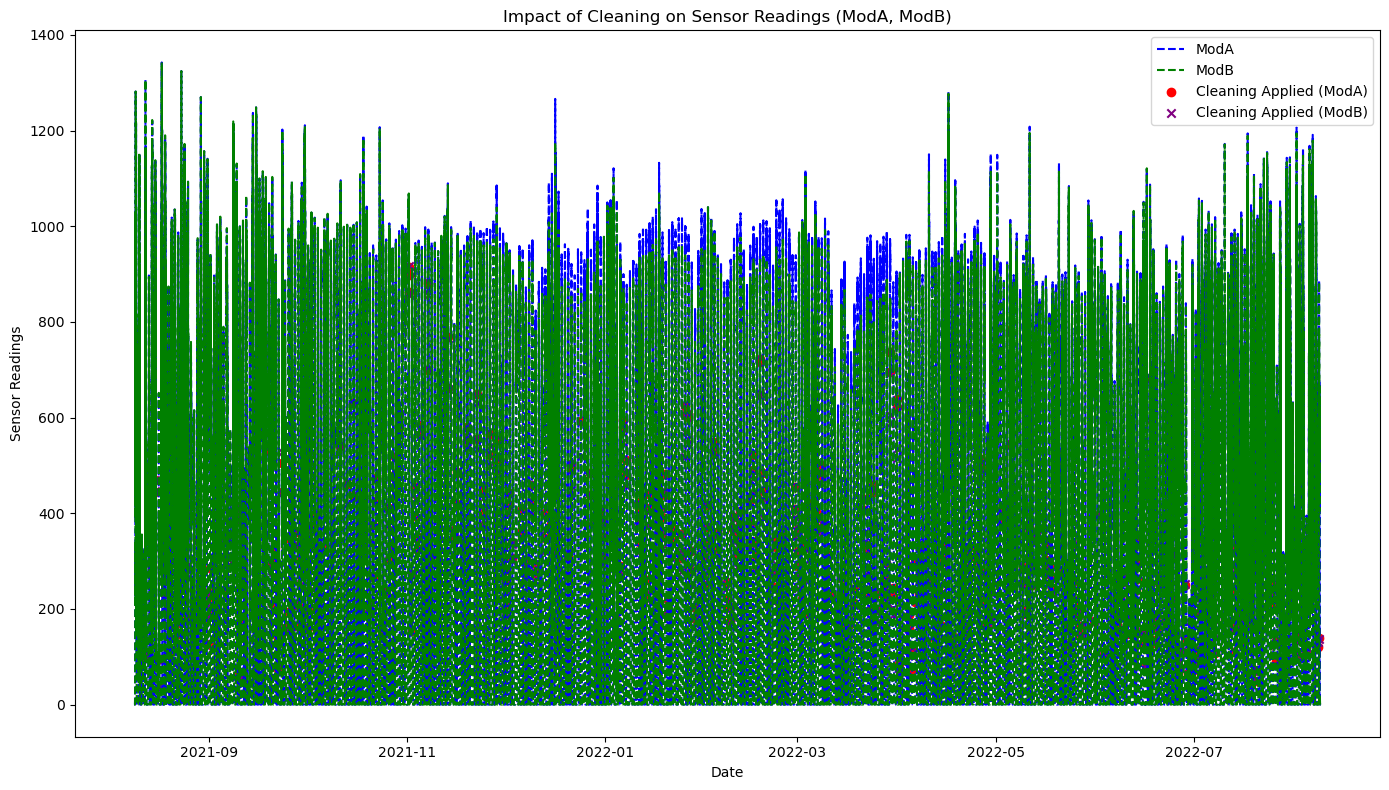

In [13]:
# Plot ModA and ModB with cleaning status over time
plt.figure(figsize=(14, 8))

plt.plot(cleaned_data.index, cleaned_data['ModA'], label='ModA', color='blue', linestyle='--')
plt.plot(cleaned_data.index, cleaned_data['ModB'], label='ModB', color='green', linestyle='--')
plt.scatter(cleaned_data.index[cleaned_data['Cleaning'] > 0], 
            cleaned_data['ModA'][cleaned_data['Cleaning'] > 0], 
            color='red', label='Cleaning Applied (ModA)', marker='o')
plt.scatter(cleaned_data.index[cleaned_data['Cleaning'] > 0], 
            cleaned_data['ModB'][cleaned_data['Cleaning'] > 0], 
            color='purple', label='Cleaning Applied (ModB)', marker='x')

plt.title('Impact of Cleaning on Sensor Readings (ModA, ModB)')
plt.xlabel('Date')
plt.ylabel('Sensor Readings')
plt.legend()
plt.tight_layout()
plt.show()


### Correlation Heatmap of Solar Radiation and Temperature Measure

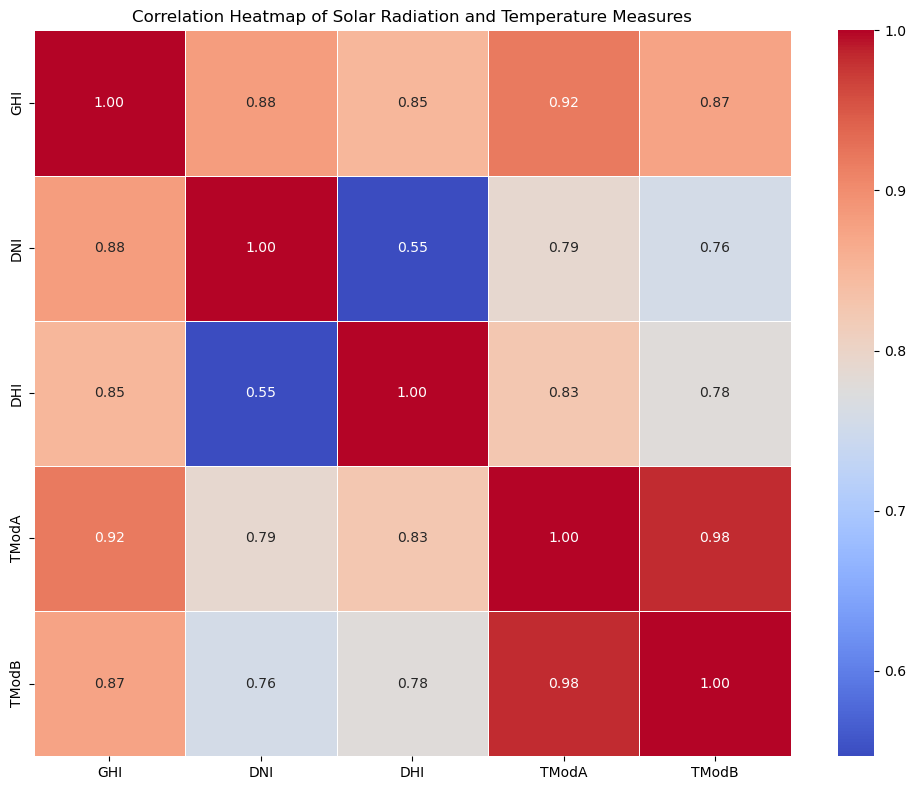

In [31]:
correlation_data = cleaned_data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']]

corr_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Solar Radiation and Temperature Measures')
plt.tight_layout()
plt.show()

###  Scatter plot of GHI vs. TModA


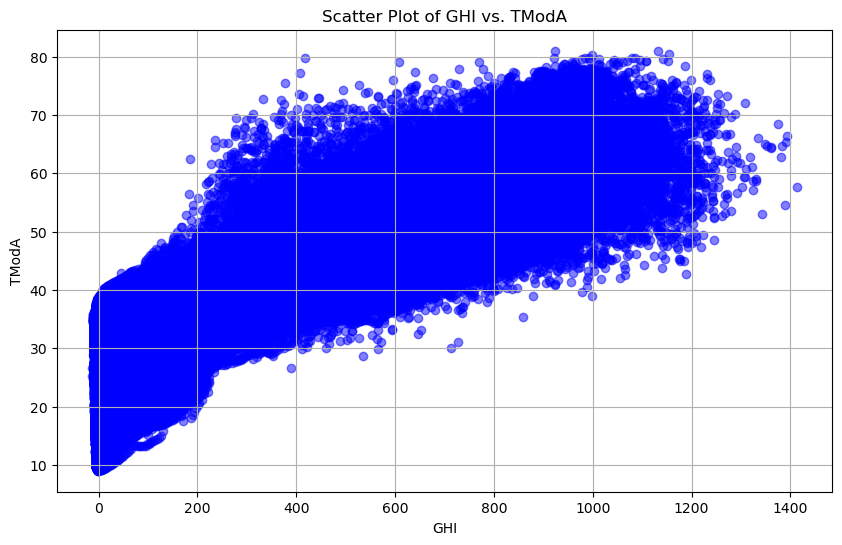

In [27]:

# Scatter plot of GHI vs. TModA
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['GHI'], cleaned_data['TModA'] , alpha=0.5, color='blue')
plt.title('Scatter Plot of GHI vs. TModA')
plt.xlabel('GHI')
plt.ylabel('TModA')
plt.grid(True)
plt.show()


### Scatter plot of WS vs. GHI


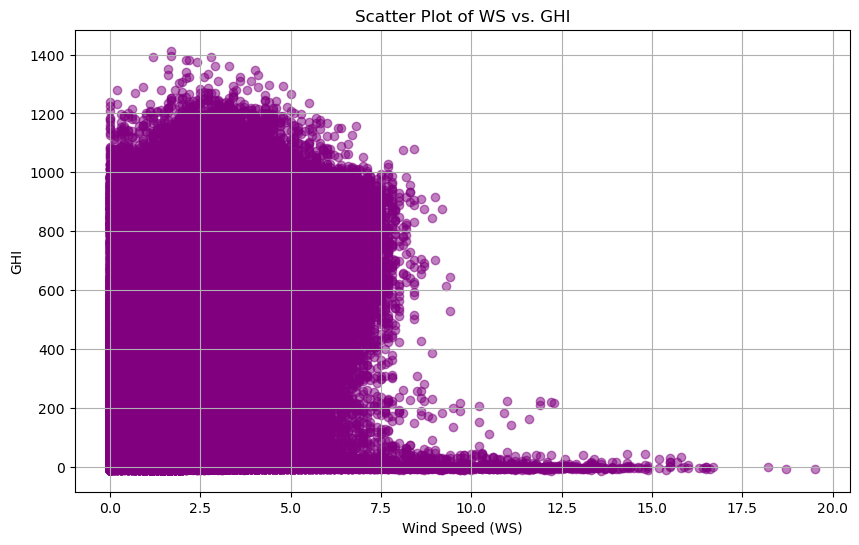

In [29]:
# Scatter plot of WS vs. GHI
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['WS'], cleaned_data['GHI'], alpha=0.5, color='purple')
plt.title('Scatter Plot of WS vs. GHI')
plt.xlabel('Wind Speed (WS)')
plt.ylabel('GHI')
plt.grid(True)
plt.show()


###  Z-scores for each variable


In [39]:
# Calculate Z-scores for each variable
z_scores = stats.zscore(cleaned_data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']])

# Convert to DataFrame for better visualization
z_scores_df = pd.DataFrame(z_scores, columns=['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD'])

# Flag outliers: Z-score > 3 or < -3
outliers = (np.abs(z_scores_df) > 3).any(axis=1)

cleaned_data.loc[:, 'Outlier'] = outliers

cleaned_data.head()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Outlier
Timestamp,,,,,,,,,,,,,,,,,,
2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,False
2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,False
2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,False
2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,False
2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,False
